In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Problem1
fireballs = pd.read_csv('cneos_fireball_data.csv')

1a. All the variables should be numerical, except for peak brightness date/time which should be a date time object. Altitude, velocity, and energy are all quantitative measures and even latitude and longitude are best represented with numbers, where negation is the difference between east and west or north and south. 

In [4]:
fireballs

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2022-09-15 02:49:02,22.7N,97.6E,31.5,NaN,NaN,NaN,NaN,2.700000e+10,0.095
1,2022-09-14 23:31:15,40.8N,63.4E,35.8,17.4,-13.9,-4.3,9.5,3.200000e+10,0.110
2,2022-09-04 03:54:55,20.0N,165.9E,14.0,21.9,18.4,-11.4,-3.5,2.400000e+10,0.086
3,2022-08-21 16:35:49,6.3S,51.5E,37.0,NaN,NaN,NaN,NaN,2.100000e+10,0.076
4,2022-08-14 07:39:18,35.0S,78.4E,55.5,NaN,NaN,NaN,NaN,4.680000e+11,1.200
...,...,...,...,...,...,...,...,...,...,...
927,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
928,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
929,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
930,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [5]:
#1b
fireballs.columns = ['Peak.Brightness.Date.Time', 'Latitude', 'Longitude', 'Altitude', 'Velocity', 'vx', 'vy', 'vz', 'Total.Radiated.Energy', 'Calculated.Total.Impact.Energy']

In [ ]:
new_lat = []
for lat in fireballs['Latitude'].tolist():
    if type(lat)==str:
        if 'N' in lat:
            l = float(lat[:-1])
        else:
            l = float(lat[:-1]) * -1
    new_lat.append(l)
new_long = []
for lon in fireballs['Longitude'].tolist():
    if type(lon) == str:
        if 'E' in lon:
            l = float(lon[:-1])
        else:
            l = float(lon[:-1]) * -1
    new_long.append(l)
fireballs['Latitude'] = new_lat
fireballs['Longitude'] = new_long

1b. The variables largely matched my expectetations, with the exception of latitude and longitude, which were represented as strings. These variables were converted to floats, with east as positive for longitude and north as positive for latitude. 

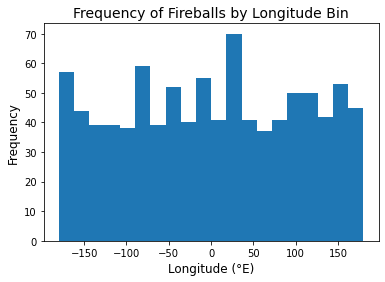

In [51]:
#1c
plt.hist(fireballs['Longitude'], 20)
plt.title('Frequency of Fireballs by Longitude Bin', fontsize=14)
plt.xlabel('Longitude (°E)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

1c. The spread of longitudes is from -180°E to 180°E, covering the circumference of the Earth. The distribution of the longitudinal locations of the fireballs is close to uniform, but not perfectly so. The center is towards the middle of the graph, but it has multimodal peaks. There is no oscillating pattern, making it most closely related to something uniformly distributed. I would have expected something closer to being perfectly uniform, but this may just be due to randomness in the data. Perhaps a dataset of 10000 fireballs, as opposed to about 1000, would result in a more even distribution than the one above. 

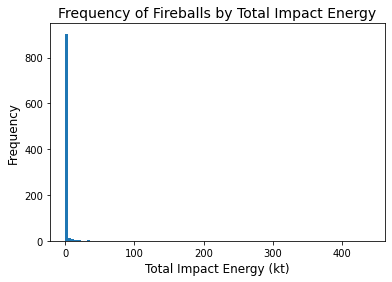

In [55]:
#1d
plt.hist(fireballs['Calculated.Total.Impact.Energy'], bins=100)
plt.title('Frequency of Fireballs by Total Impact Energy', fontsize=14)
plt.xlabel('Total Impact Energy (kt)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

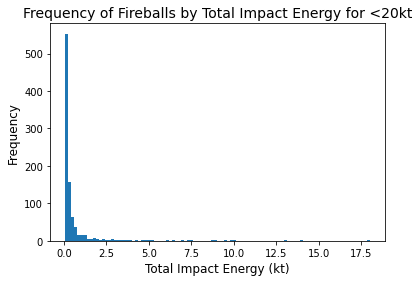

In [56]:
energy_balls = [i for i in fireballs['Calculated.Total.Impact.Energy'].tolist() if i < 20]
plt.hist(energy_balls, bins=100)
plt.title('Frequency of Fireballs by Total Impact Energy for <20kt', fontsize=14)
plt.xlabel('Total Impact Energy (kt)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

1d. The distribution of total impact energy is very right-skewed and the spread is from 0 to over 400 for the full range of values in the first histogram. Looking at the first histogram, it is clear that almost all fireballs were in the bin with less than 5kt of impact energy given off. Looking at the second one, which excludes those with greater than or equal to 20kt of impact energy, we can see that really almost all of the fireballs gave off an impact energy between 0 and 0.2 kt and confirm that that is where the center of the distribution is. Meanwhile, there is a massive outlier in the first histogram at over 400kt of impact energy, making the distribution seem even more dramatically right skewed than it is. Furthermore, looking at the second histogram, even fireballs with more than 7.5kt of impact energy should be considered outliers, given how much greater they are than the mean and median fireball impact energies. This is largely to be expected - it makes sense that of the hundreds objects that impacted the earth, most were quite small. Otherwise, there would be many more noticeable events of fireballs hitting the earth than we are normally aware of. 

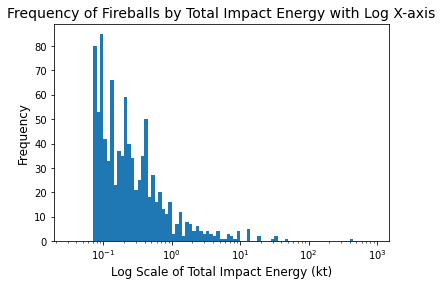

In [60]:
#1e
bins = 10**(np.arange(-1.5,3,0.05))
plt.xscale('log')
plt.hist(fireballs['Calculated.Total.Impact.Energy'],bins=bins) 
plt.title('Frequency of Fireballs by Total Impact Energy with Log X-axis', fontsize=14)
plt.xlabel('Log Scale of Total Impact Energy (kt)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

1e. Using a log scale, the distribution of the histogram is still right-skewed, although not nearly as dramatically as it was before. The center is still in the same place, since almost all of the energies are bewtween 10^-1 and 10^-1/3. Some of the outliers don't look quite as much like outliers this way, with the definition for outliers looking like it should be applied to values beyond 15 than 7.5. Otherwise, the details of the graph are largely the same, with the most dramatic outliers still identifiable as outliers and the shape of the graph pretty similar, if not quite so steep. 

In [15]:
df = pd.read_fwf('nat2021us.txt')

In [17]:
colspecs = [(12,14), (119,120)]
df = pd.read_fwf('nat2021us.txt', colspecs=colspecs)
df

,01,1
0,1,2.0
1,1,2.0
2,1,2.0
3,1,2.0
4,1,1.0
...,...,...
3669922,12,1.0
3669923,10,2.0
3669924,12,1.0
3669925,6,2.0


In [ ]:
birth_sample = df.sample(n=20000, random_state=1)
birth_sample

In [19]:
birth_sample.columns = ['Birth Month', 'Marital Status']

In [31]:
married = birth_sample[birth_sample['Marital Status']==1.0]
unmarried = birth_sample[birth_sample['Marital Status']==2.0]
m_data = []
u_data = []
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for month in months:
    month_data1 = married[married['Birth Month']==month]
    month_data2 = unmarried[unmarried['Birth Month']==month]
    m_data.append(len(month_data1)/len(married))
    u_data.append(len(month_data2)/len(unmarried))

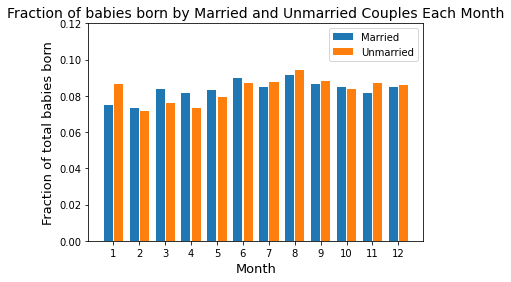

In [48]:

x = np.arange(1, len(months)+1)
plt.bar(x-0.2, height=m_data, width=0.35, label='Married')
plt.bar(x+0.2, height=u_data, width=0.35, label='Unmarried')
plt.legend()
plt.xticks(x)
plt.yticks([0.00, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12])
plt.ylabel('Fraction of total babies born', fontsize=13)
plt.xlabel('Month', fontsize=13)
plt.title('Fraction of babies born by Married and Unmarried Couples Each Month', fontsize=14)
plt.show()

Caption: The above figure is a bar graph displaying data Centers for Disease Control and Prevention Birth Data for the year 2021. Out of nearly 4 million samples in the data, a random sample of 20000 was selected for the visualization. The only columns used were the birth month and the marital status of the parent. The fraction of babies born in a given birth month out of the year for married and unmarried couples are displayed side by side on the graph. The month scale uses the traditional date convention where 1 is January and 12 is December.

Analysis: The above bar graph has multiple implications for births in the year 2021. For one, the highest frequency of births once again occurred during August, which is a continuation of previous trends. Previous research has suggested that this is usually the case because people are more likely to concieve during the holiday season. On a broader scale, the winter months in general tend to have much lower birth rates than the summer months. That being said, no months had less than 7% of and no more than 10% of total babies born during the month. The other dimension of this involves the timing of births for married versus unmarried couples. While some of the same trends exist, such as more births during the summer months and fewer births during winter, there are some differences between the two. Most notably, unmarried women are much more likely to give birth in January than married women, and less likely to give birth during March and April. There is little outside research on when married versus unmarried couples tend to have children, so this could just be a result of randomness from the year and/or the sample taken of the data. This could be supported by the distribution of times of married women giving birth being more uniform than the distribution of unmarried women giving birth, since there is a larger sample of married parents than unmarried parents in the sample data. However, the sample was randomly taken and is fairly large, meaning it should be largely representative, such that differences between married and unmarried birth times as large as those noticed are unlikely to just be random. For example, there could be some reason unexplored by research explaining why unmarried couples concieve more often than married ones in April, explaining the difference in birth rates in January. 